# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Working with data

In [3]:
train_data = pd.read_csv('kdd_train.csv')
test_data = pd.read_csv('kdd_test.csv')

In [4]:
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [5]:
test_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,5,tcp,smtp,SF,2429,475,0,0,0,0,...,57,0.11,0.02,0.01,0.04,0.0,0.0,0.87,0.0,normal
1,0,udp,domain_u,SF,45,134,0,0,0,0,...,155,0.80,0.02,0.01,0.00,0.0,0.0,0.00,0.0,normal
2,0,udp,domain_u,SF,45,80,0,0,0,0,...,255,1.00,0.00,0.01,0.00,0.0,0.0,0.00,0.0,normal
3,1979,udp,other,SF,145,105,0,0,0,0,...,2,0.01,0.84,1.00,0.00,0.0,0.0,0.00,0.0,normal
4,14462,tcp,other,RSTR,1,0,0,0,0,0,...,2,0.01,0.68,1.00,0.00,0.0,0.0,1.00,1.0,portsweep


**EDA**

In [6]:
train_data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

No null values in training set

In [7]:
test_data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

No null values in test set as well

In [8]:
# Type of features
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [9]:
train_data.nunique()

duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

In [10]:
test_data.nunique()

duration                        704
protocol_type                     3
service                          66
flag                             11
src_bytes                      1517
dst_bytes                      3745
land                              2
wrong_fragment                    3
urgent                            3
hot                              18
num_failed_logins                 6
logged_in                         2
num_compromised                  29
root_shell                        2
su_attempted                      3
num_root                         27
num_file_creations               14
num_shells                        3
num_access_files                  7
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           476
srv_count                       428
serror_rate                      85
srv_serror_rate                  66
rerror_rate                      85
srv_rerror_rate             

There are few concerns like **degree of mismatch** in features for training and testing dataset. Certain integer features are varying in very large rangeslike duration, hot, count, srv_count, src_bytes. dst_bytes, num_compromised, num_root, dst_host_count, dst_host_srv_count.

In [11]:
train_data['labels'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: labels, dtype: int64

In [12]:
test_data['labels'].value_counts()

normal             11245
neptune             6654
satan                698
smurf                540
ipsweep              479
guess_passwd         411
portsweep            371
mscan                310
warezmaster          279
apache2              228
back                 227
processtable         211
nmap                 206
warezclient          107
teardrop             104
snmpguess             99
mailbomb              94
saint                 93
snmpgetattack         43
httptunnel            41
pod                   35
buffer_overflow       17
multihop               9
ps                     9
sendmail               8
xlock                  4
loadmodule             4
rootkit                4
xterm                  3
land                   2
imap                   2
ftp_write              2
named                  2
phf                    1
perl                   1
xsnoop                 1
Name: labels, dtype: int64

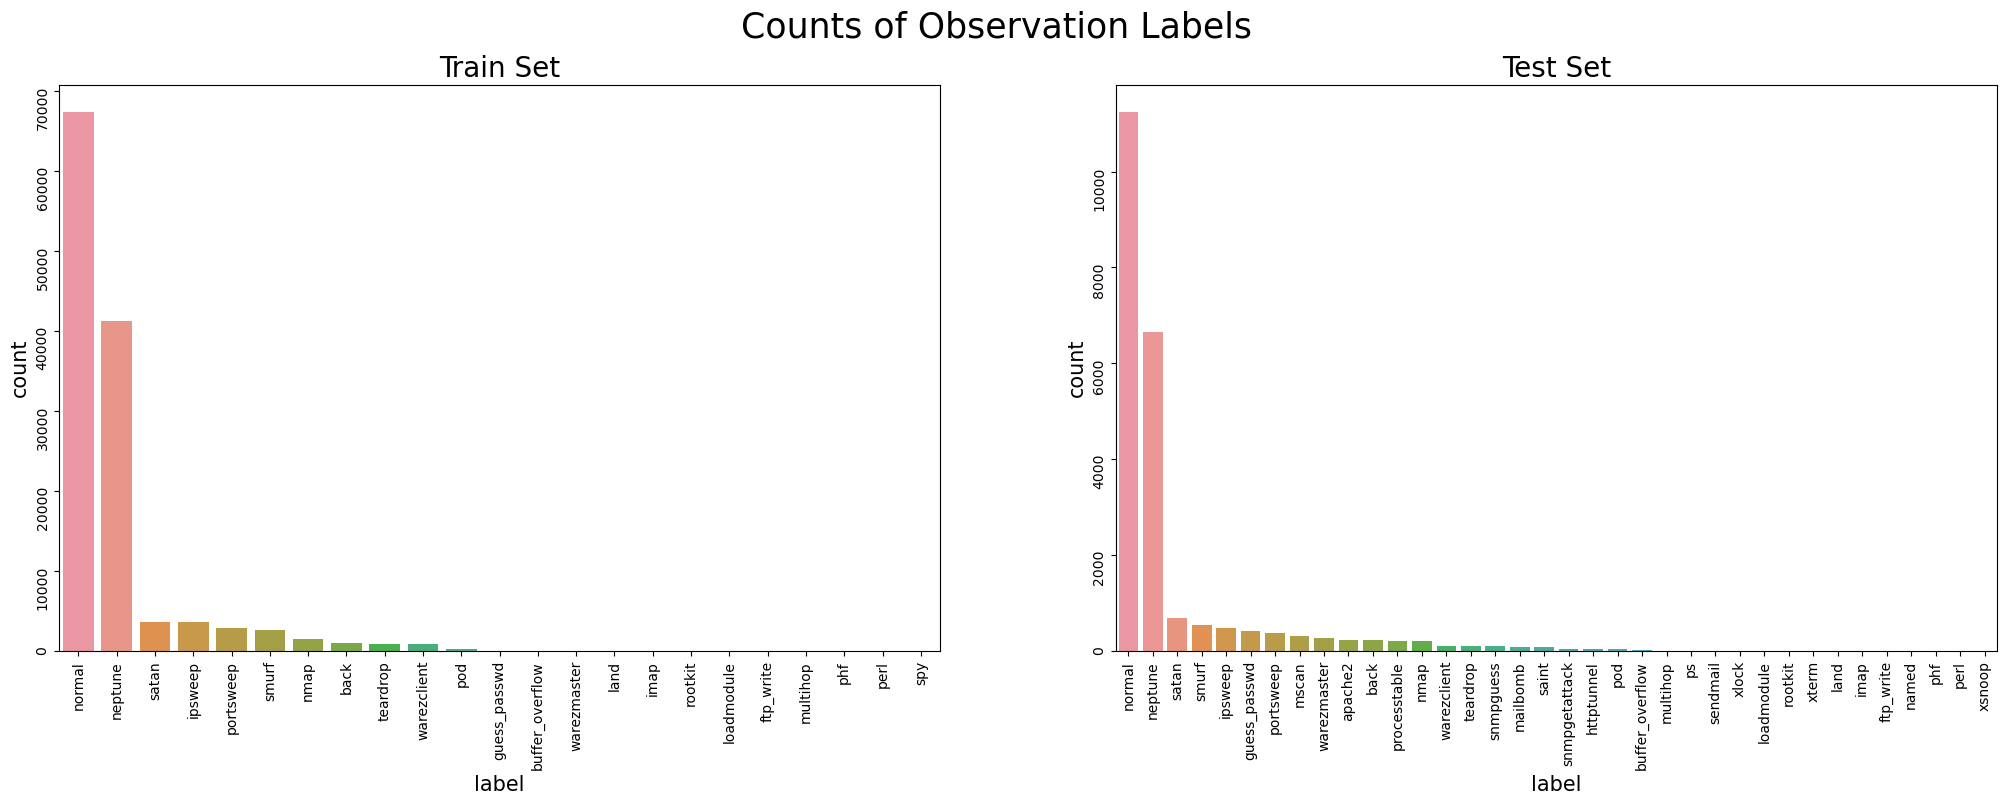

In [13]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(25, 7.5), dpi=100)

fig.suptitle(f'Counts of Observation Labels', fontsize=25)

sns.countplot(x="labels", data = train_data, 
              order=train_data['labels'].value_counts().index, ax=ax1)

ax1.set_title('Train Set', fontsize=20)
ax1.set_xlabel('label', fontsize=15)
ax1.set_ylabel('count', fontsize=15)
ax1.tick_params(labelrotation=90)

sns.countplot(x="labels", data = test_data,
              order=test_data['labels'].value_counts().index, ax=ax2)

ax2.set_title('Test Set', fontsize=20)
ax2.set_xlabel('label', fontsize=15)
ax2.set_ylabel('count', fontsize=15)
ax2.tick_params(labelrotation=90)

plt.show()

There is a large variation in count of attacks especially for neptune and normal to the other. We need to downsample these attacks for better comparision with other attacks

In [14]:
traindata_copy = train_data.copy()                                                                       
testdata_copy = test_data.copy()    

train_normal_copy = traindata_copy[traindata_copy['labels']=='normal'].copy()                        
train_neptune_copy = traindata_copy[traindata_copy['labels']=='neptune'].copy() 

test_normal_copy = testdata_copy[testdata_copy['labels']=='normal'].copy()                        
test_neptune_copy = testdata_copy[testdata_copy['labels']=='neptune'].copy() 

train_normal_sampled = train_normal_copy.sample(n=5000, random_state=42)             
train_neptune_sampled = train_neptune_copy.sample(n=5000, random_state=42)           

test_normal_sampled = test_normal_copy.sample(n=1000, random_state=42)               
test_neptune_sampled = test_neptune_copy.sample(n=1000, random_state=42)             

train_data.drop(train_data.loc[train_data['labels']=='normal'].index, inplace=True)              
train_data.drop(train_data.loc[train_data['labels']=='neptune'].index, inplace=True)             

test_data.drop(test_data.loc[test_data['labels']=='normal'].index, inplace=True)                 
test_data.drop(test_data.loc[test_data['labels']=='neptune'].index, inplace=True)                

train_data = pd.concat([train_data, train_normal_sampled, train_neptune_sampled], axis=0) 
test_data = pd.concat([test_data, test_normal_sampled, test_neptune_sampled], axis=0) 

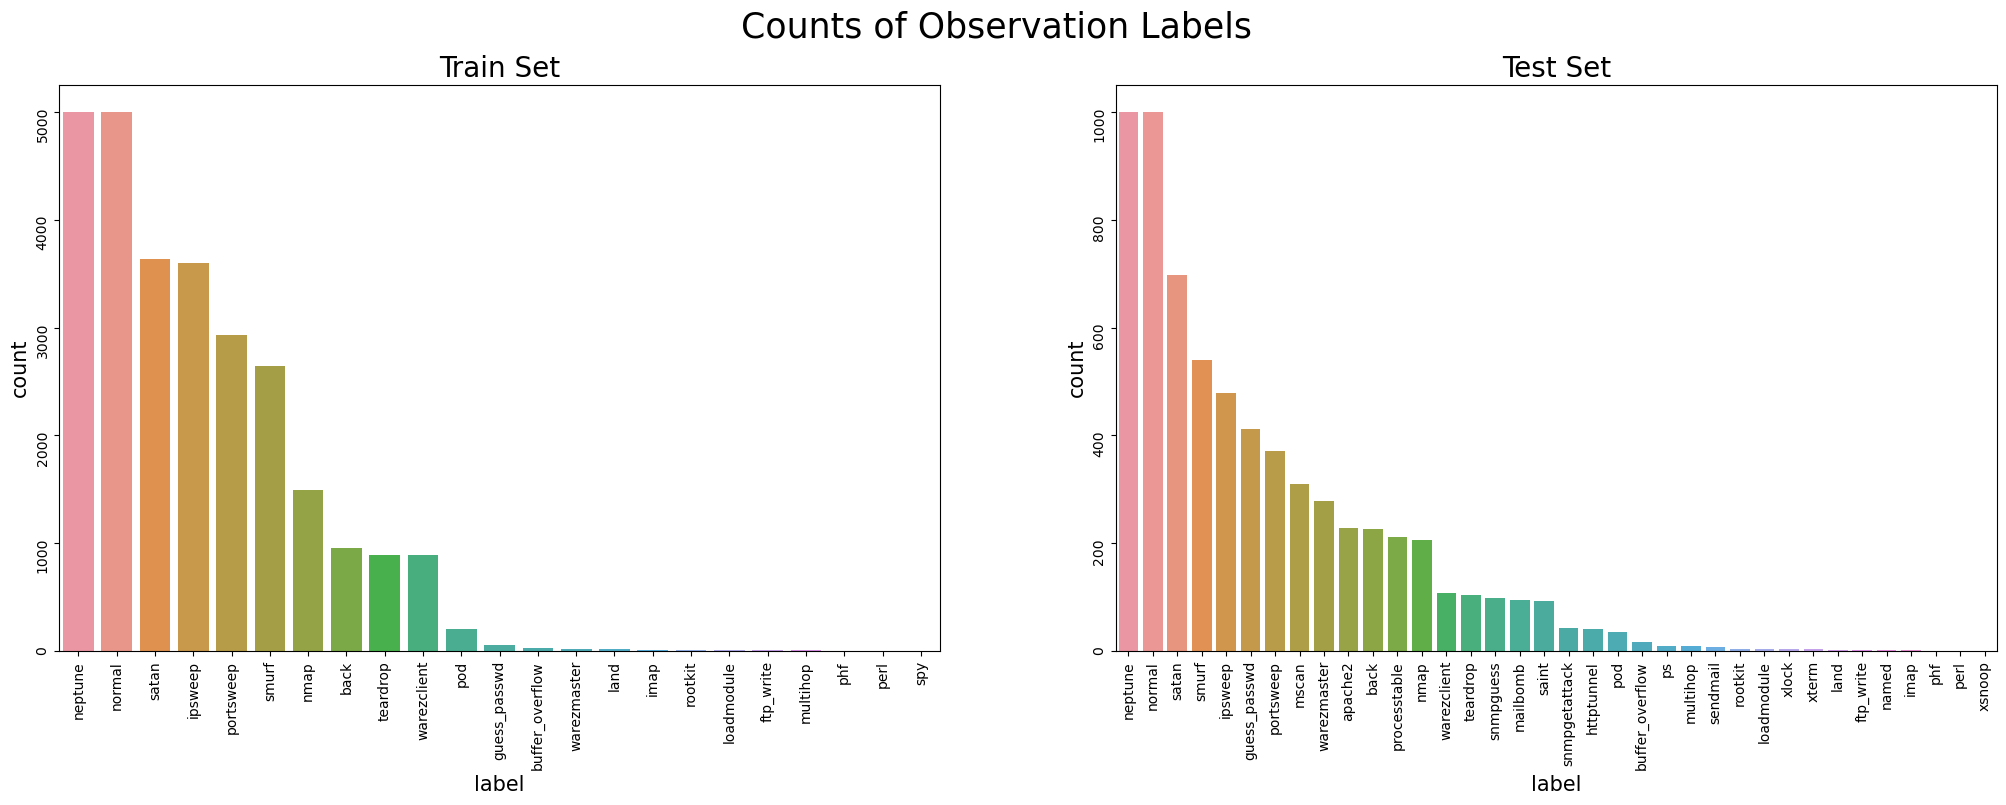

In [15]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(25, 7.5), dpi=100)

fig.suptitle(f'Counts of Observation Labels', fontsize=25)

sns.countplot(x="labels", data = train_data, 
              order=train_data['labels'].value_counts().index, ax=ax1)

ax1.set_title('Train Set', fontsize=20)
ax1.set_xlabel('label', fontsize=15)
ax1.set_ylabel('count', fontsize=15)
ax1.tick_params(labelrotation=90)

sns.countplot(x="labels", data = test_data,
              order=test_data['labels'].value_counts().index, ax=ax2)

ax2.set_title('Test Set', fontsize=20)
ax2.set_xlabel('label', fontsize=15)
ax2.set_ylabel('count', fontsize=15)
ax2.tick_params(labelrotation=90)

plt.show()

Now it is better with few attacks but we can observe still few attacks are very low in quantity we can consider them as rare case attacks and add all of them to other category, There are few attacks present in test data not in train data if those attacks are very less in quantity they are merged with others, or 60% of data of that particular attack is transferred to train data. By that attacks mscan, apache2, processtable are not added to others in test data and 60% of their data is transferring to train data, and attack in train data not in test data are also added to other category.

Attacks with less than 100 data points are added to other

with respect to train data

In [16]:
keep_labels = ['normal', 'neptune', 'satan', 'ipsweep', 'portsweep', 'smurf', 'nmap', 'back', 'teardrop', 'warezclient']

train_data['labels'] = train_data['labels'].apply(lambda x: x if x in keep_labels else 'other')

Getting data of attacks that need to be added in train data from test data

In [17]:
sample_data = pd.DataFrame()
mscan_data = test_data[test_data['labels']=='mscan']
apac_data = test_data[test_data['labels']=='apache2']
proc_data = test_data[test_data['labels']=='processtable']
sample_data = pd.concat([sample_data, mscan_data, apac_data, proc_data], axis=0) 

In [18]:
sample_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
115,0,tcp,telnet,REJ,0,0,0,0,0,0,...,86,0.34,0.06,0.01,0.02,0.00,0.00,0.89,0.70,mscan
191,2,tcp,telnet,SF,24,109,0,0,0,0,...,84,0.33,0.03,0.01,0.02,0.00,0.00,0.89,0.70,mscan
298,0,tcp,telnet,RSTO,0,12,0,0,0,0,...,14,0.05,0.02,0.00,0.00,0.00,0.00,0.08,0.50,mscan
312,0,tcp,telnet,REJ,0,0,0,0,0,0,...,84,0.32,0.07,0.01,0.02,0.00,0.00,0.91,0.71,mscan
323,0,tcp,telnet,RSTO,0,12,0,0,0,0,...,33,0.13,0.02,0.00,0.00,0.00,0.00,0.19,0.52,mscan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21839,0,tcp,telnet,S3,0,44,0,0,0,0,...,86,0.34,0.03,0.00,0.00,0.03,0.08,0.11,0.15,processtable
21874,0,tcp,telnet,S3,0,44,0,0,0,0,...,153,0.60,0.03,0.00,0.00,0.31,0.52,0.11,0.08,processtable
22140,0,tcp,telnet,S3,0,44,0,0,0,0,...,88,0.35,0.58,0.00,0.00,0.25,0.72,0.56,0.00,processtable
22171,8120,tcp,telnet,SF,0,15,0,0,0,0,...,61,0.24,0.04,0.00,0.00,0.00,0.02,0.11,0.21,processtable


In [19]:
test_data.drop(test_data.loc[test_data['labels']=='mscan'].index, inplace=True)
test_data.drop(test_data.loc[test_data['labels']=='apache2'].index, inplace=True)
test_data.drop(test_data.loc[test_data['labels']=='processtable'].index, inplace=True)

In [20]:
keep_labels = ['normal', 'neptune', 'satan', 'ipsweep', 'portsweep', 'smurf', 'nmap', 'back', 'teardrop', 'warezclient']

test_data['labels'] = test_data['labels'].apply(lambda x: x if x in keep_labels else 'other')

In [21]:
from sklearn.model_selection import train_test_split
train_sample_data, test_sample_data = train_test_split(sample_data, test_size=0.3, random_state = 42)
train_data = pd.concat([train_data, train_sample_data], axis=0)
test_data = pd.concat([test_data, test_sample_data], axis=0)

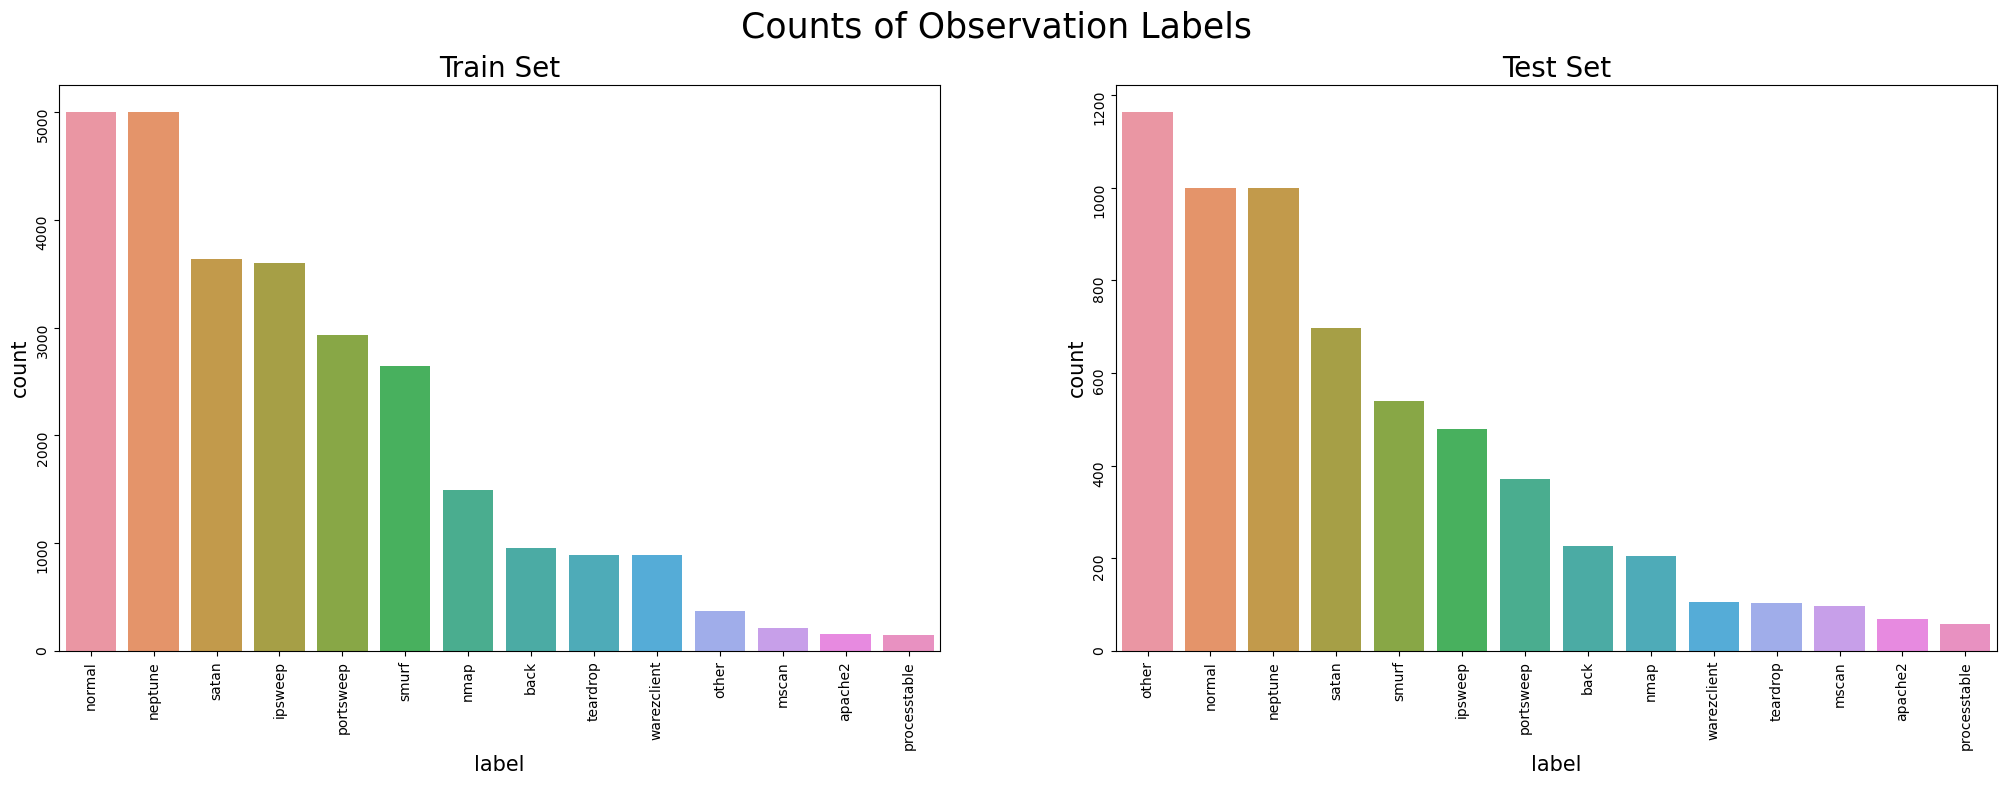

In [22]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(25, 7.5), dpi=100)

fig.suptitle(f'Counts of Observation Labels', fontsize=25)

sns.countplot(x="labels", data = train_data, 
              order=train_data['labels'].value_counts().index, ax=ax1)

ax1.set_title('Train Set', fontsize=20)
ax1.set_xlabel('label', fontsize=15)
ax1.set_ylabel('count', fontsize=15)
ax1.tick_params(labelrotation=90)

sns.countplot(x="labels", data = test_data,
              order=test_data['labels'].value_counts().index, ax=ax2)

ax2.set_title('Test Set', fontsize=20)
ax2.set_xlabel('label', fontsize=15)
ax2.set_ylabel('count', fontsize=15)
ax2.tick_params(labelrotation=90)

plt.show()

After preprocessing as well we can find there are large no of data points with other attacks in test dataset and very less in train dataset. We would divide the other data points to test set and the train set in 1:4 ratio.

In [23]:
test_other_slice = test_data[test_data['labels']=='other'].copy()

train_other_sampled, test_other_sampled = train_test_split(test_other_slice, test_size=0.25, random_state=42)

test_data.drop(test_data.loc[test_data['labels']=='other'].index, inplace=True)

train_data = pd.concat([train_data, train_other_sampled], axis=0)
test_data = pd.concat([test_data, test_other_sampled], axis=0)

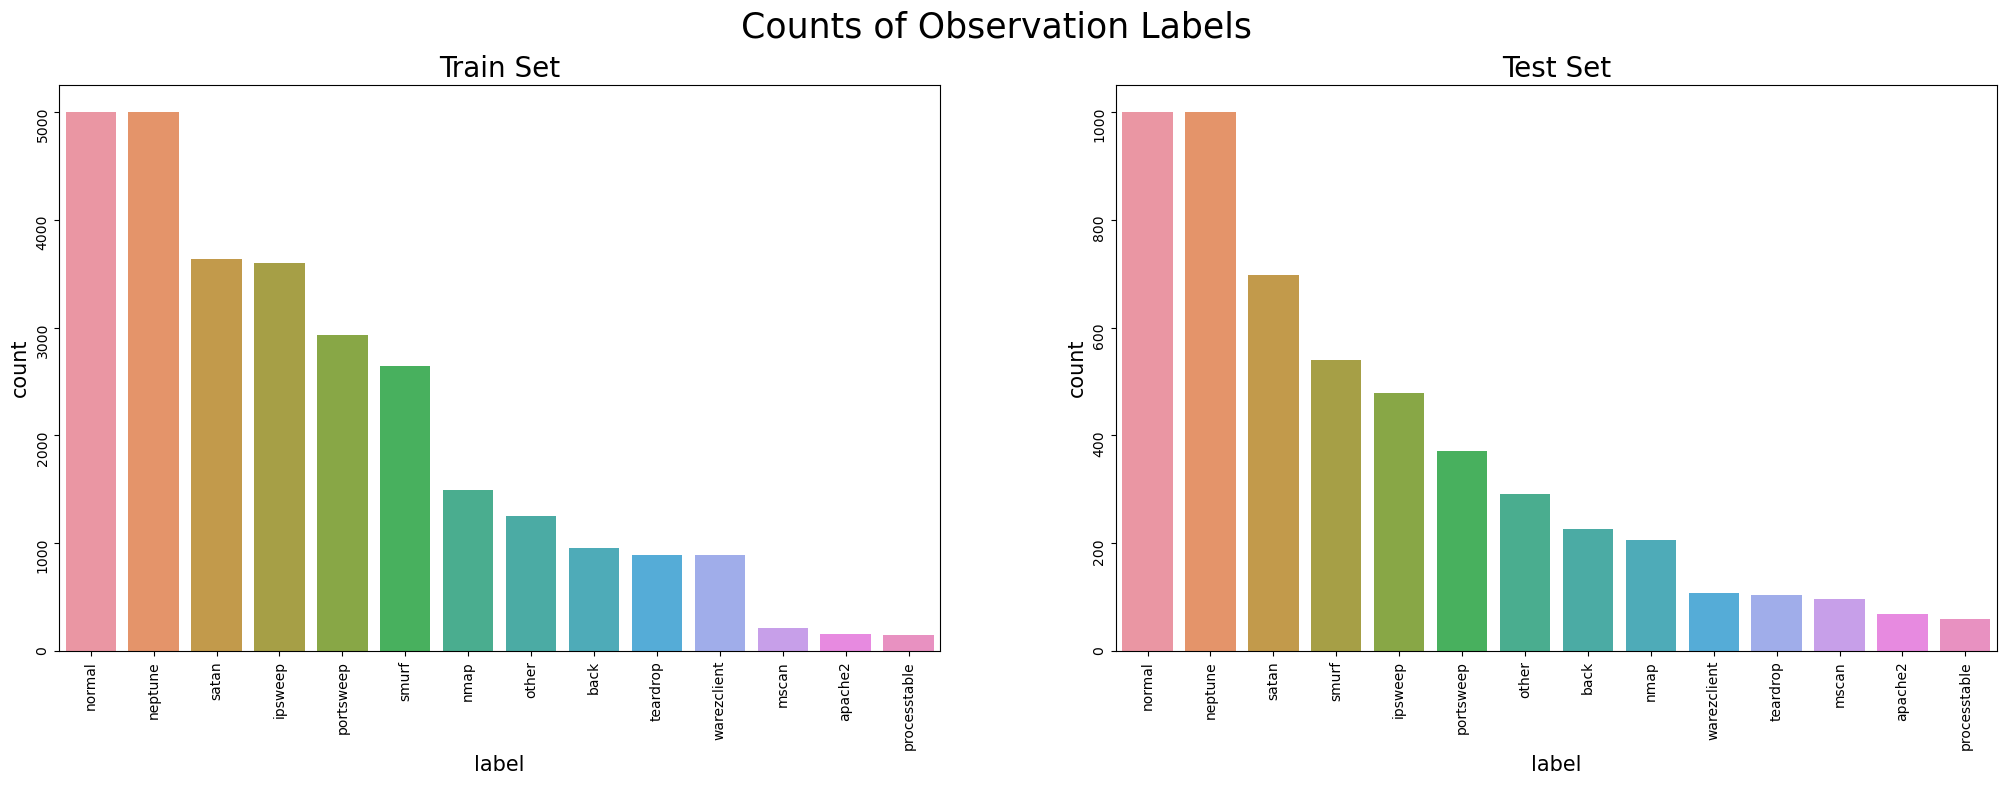

In [24]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(25, 7.5), dpi=100)

fig.suptitle(f'Counts of Observation Labels', fontsize=25)

sns.countplot(x="labels", data = train_data, 
              order=train_data['labels'].value_counts().index, ax=ax1)

ax1.set_title('Train Set', fontsize=20)
ax1.set_xlabel('label', fontsize=15)
ax1.set_ylabel('count', fontsize=15)
ax1.tick_params(labelrotation=90)

sns.countplot(x="labels", data = test_data,
              order=test_data['labels'].value_counts().index, ax=ax2)

ax2.set_title('Test Set', fontsize=20)
ax2.set_xlabel('label', fontsize=15)
ax2.set_ylabel('count', fontsize=15)
ax2.tick_params(labelrotation=90)

plt.show()

In [34]:
def histPlot(data, cols, title):
    grid = gridspec.GridSpec(10, 2, wspace=0.5, hspace=0.5) 
    fig = plt.figure(figsize=(15,25)) 
    
    for n, col in enumerate(data[cols]):         
        ax = plt.subplot(grid[n]) 
        ax.hist(data[col], bins=20) 
        ax.set_title(f'{col} distribution', fontsize=15) 
    
    fig.suptitle(title, fontsize=20)
    grid.tight_layout(fig, rect=[0, 0, 1, 0.97])
    plt.show()

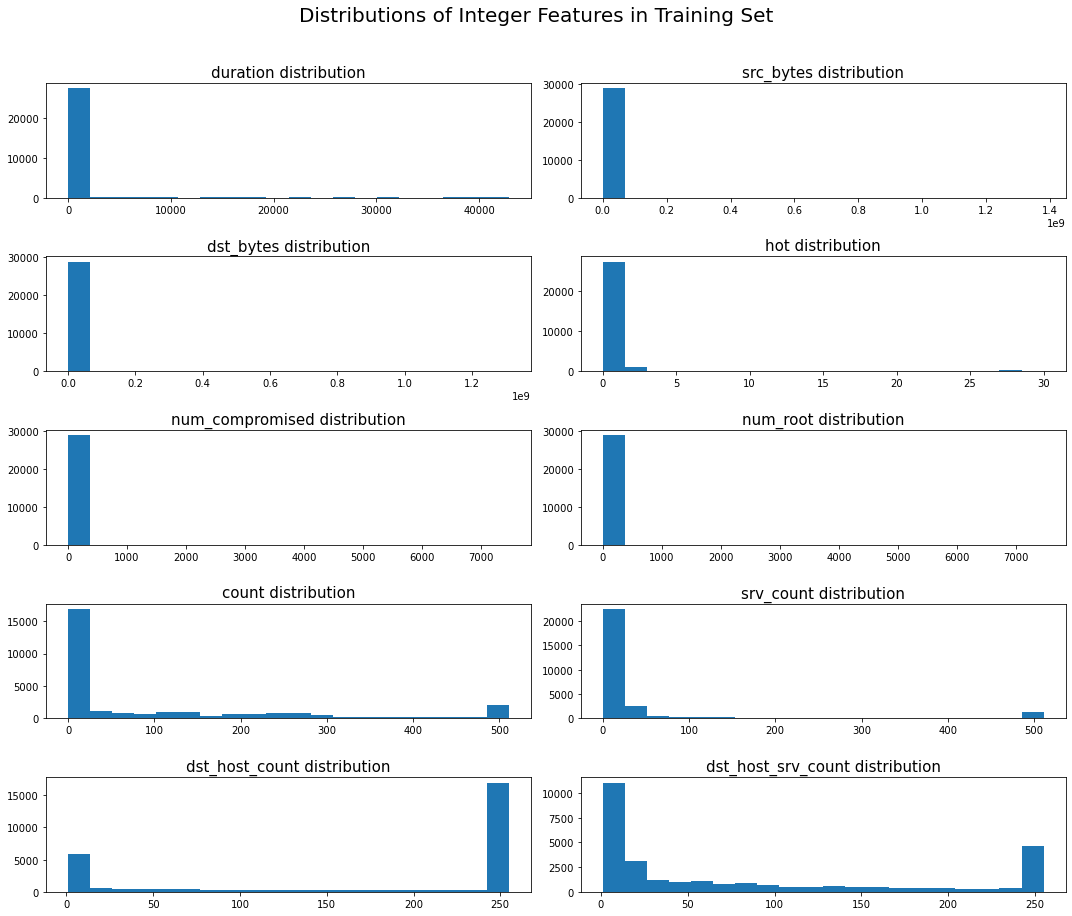

In [36]:
import matplotlib.gridspec as gridspec 
hist_cols = [ 'duration', 'src_bytes', 'dst_bytes', 'hot', 'num_compromised', 'num_root', 'count', 'srv_count', 'dst_host_count', 'dst_host_srv_count']
    
histPlot(train_data, hist_cols, 'Distributions of Integer Features in Training Set')

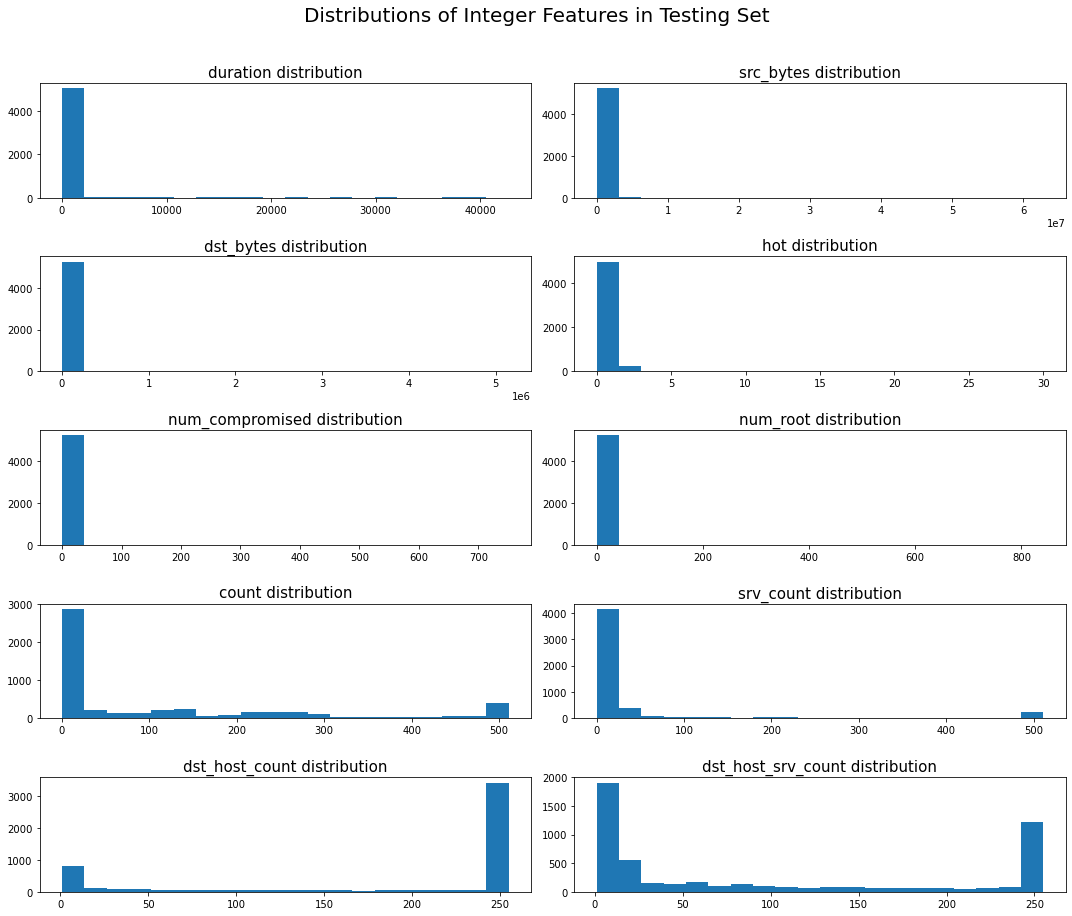

In [37]:
histPlot(test_data, hist_cols, 'Distributions of Integer Features in Testing Set')

We can observe a skewed overall distribution in above plots for most of the columns in the data. We can see these columns have bimodal or multimodal distributions within a large ranges. We need to normalize these columns for better results. 

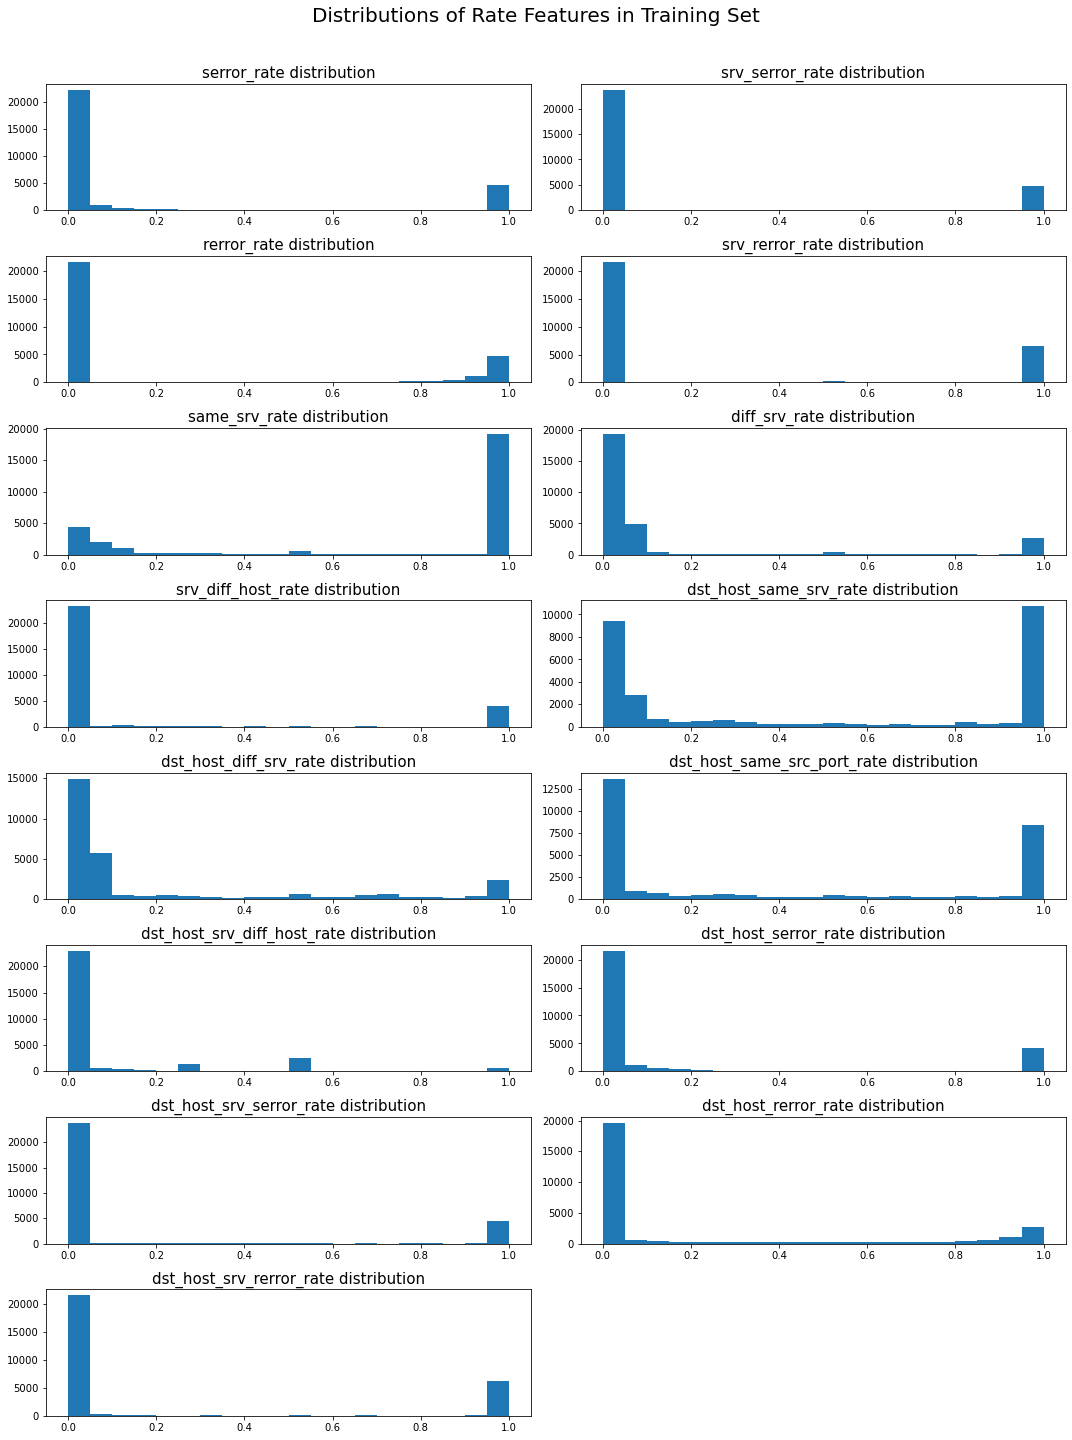

In [38]:
rate_cols = [ 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']

histPlot(train_data, rate_cols, 'Distributions of Rate Features in Training Set')

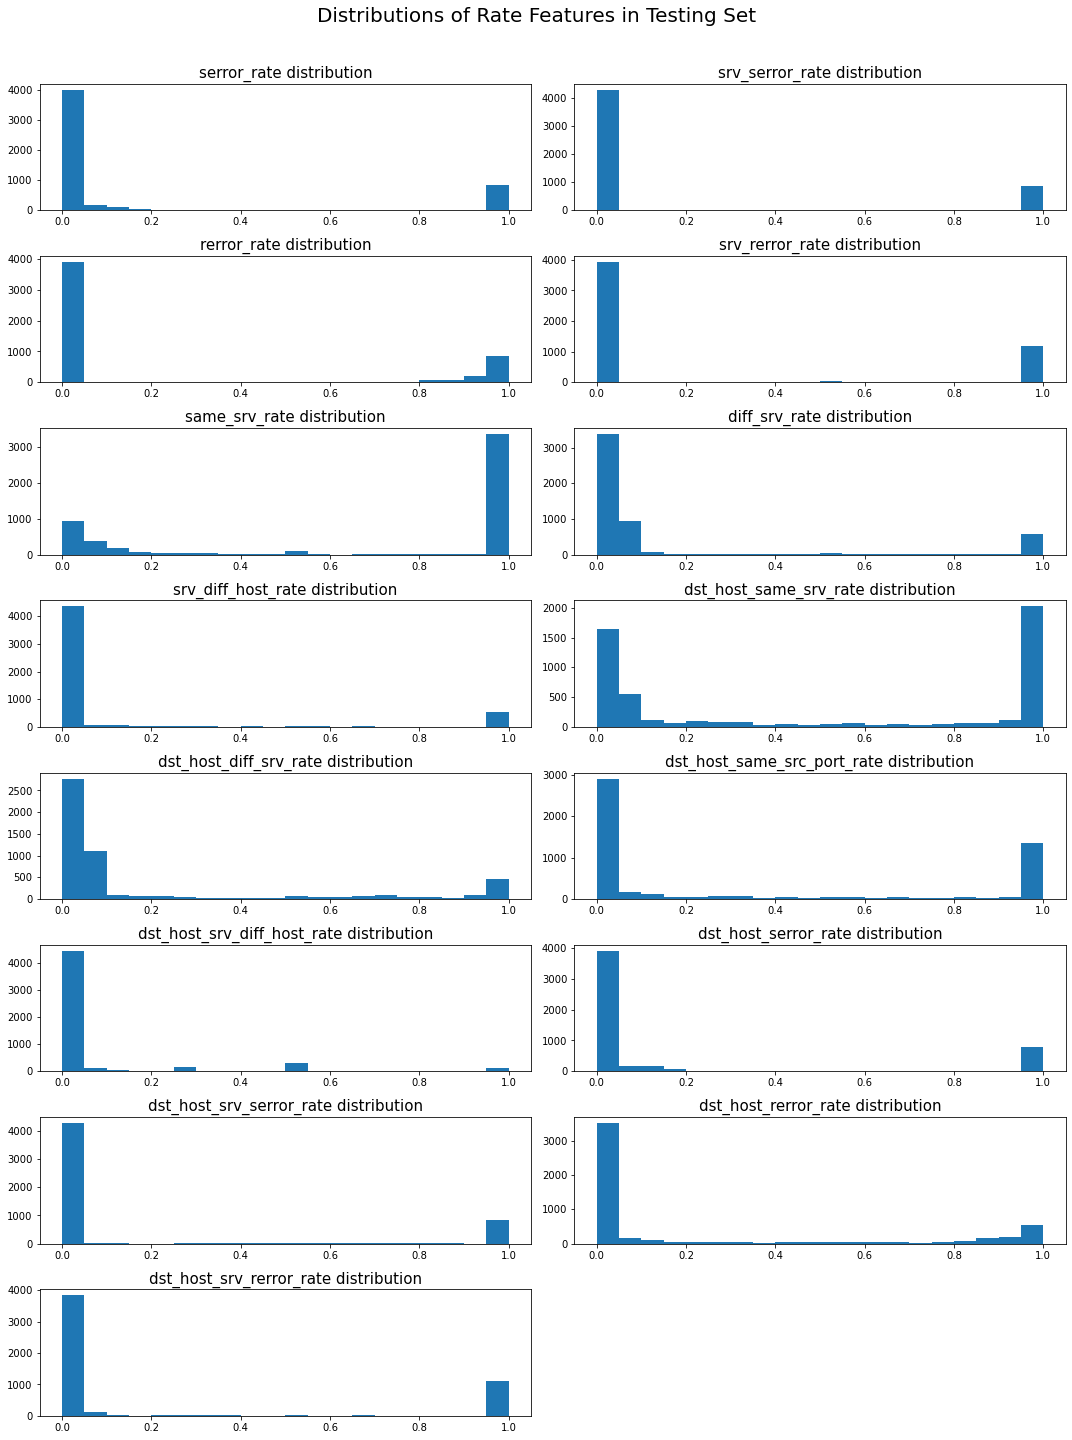

In [39]:
histPlot(test_data, rate_cols, 'Distributions of Rate Features in Testing Set')

Here range of features are from 0 to 1 

Normalizing integer type features with more than 10 unique values

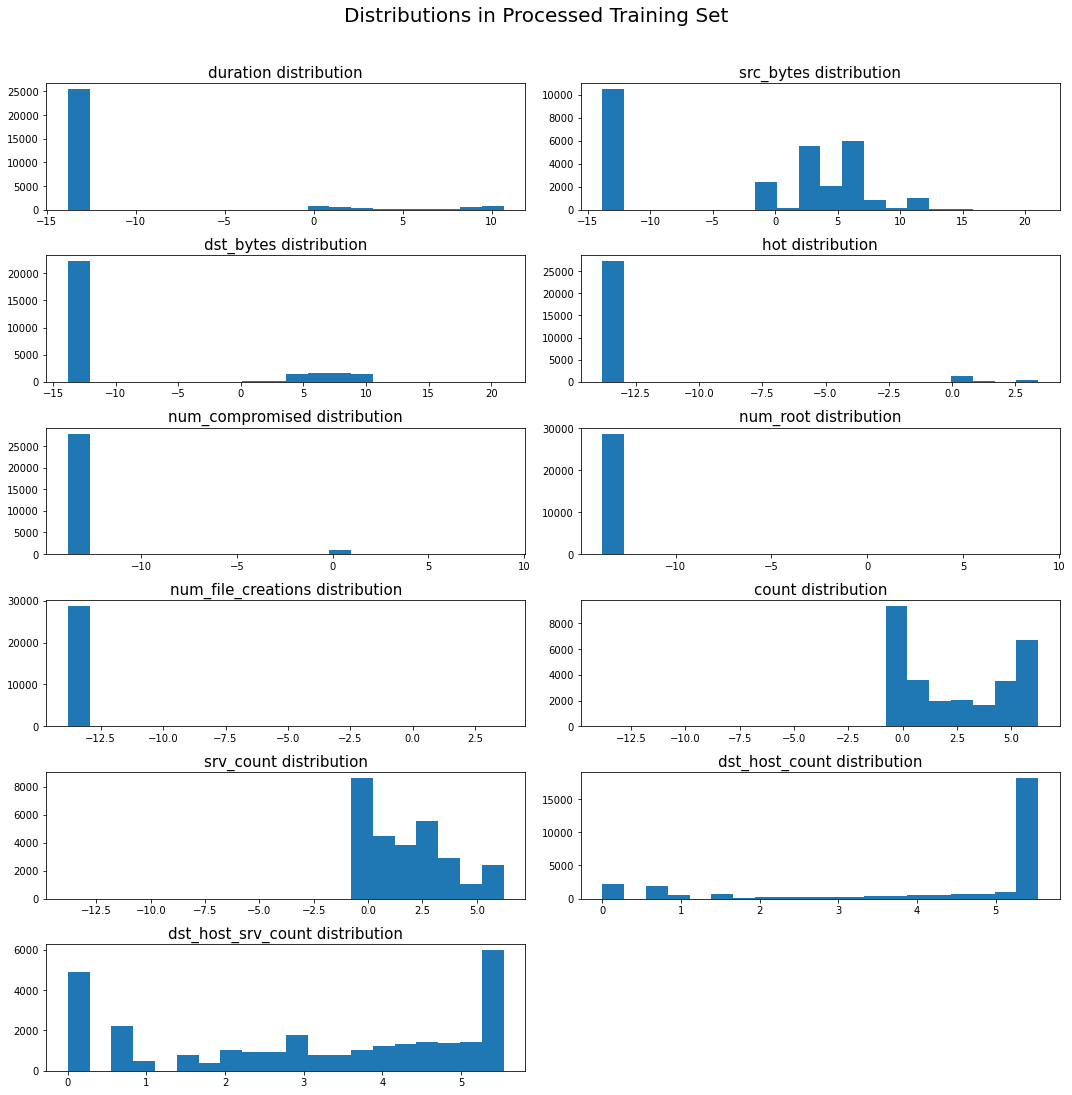

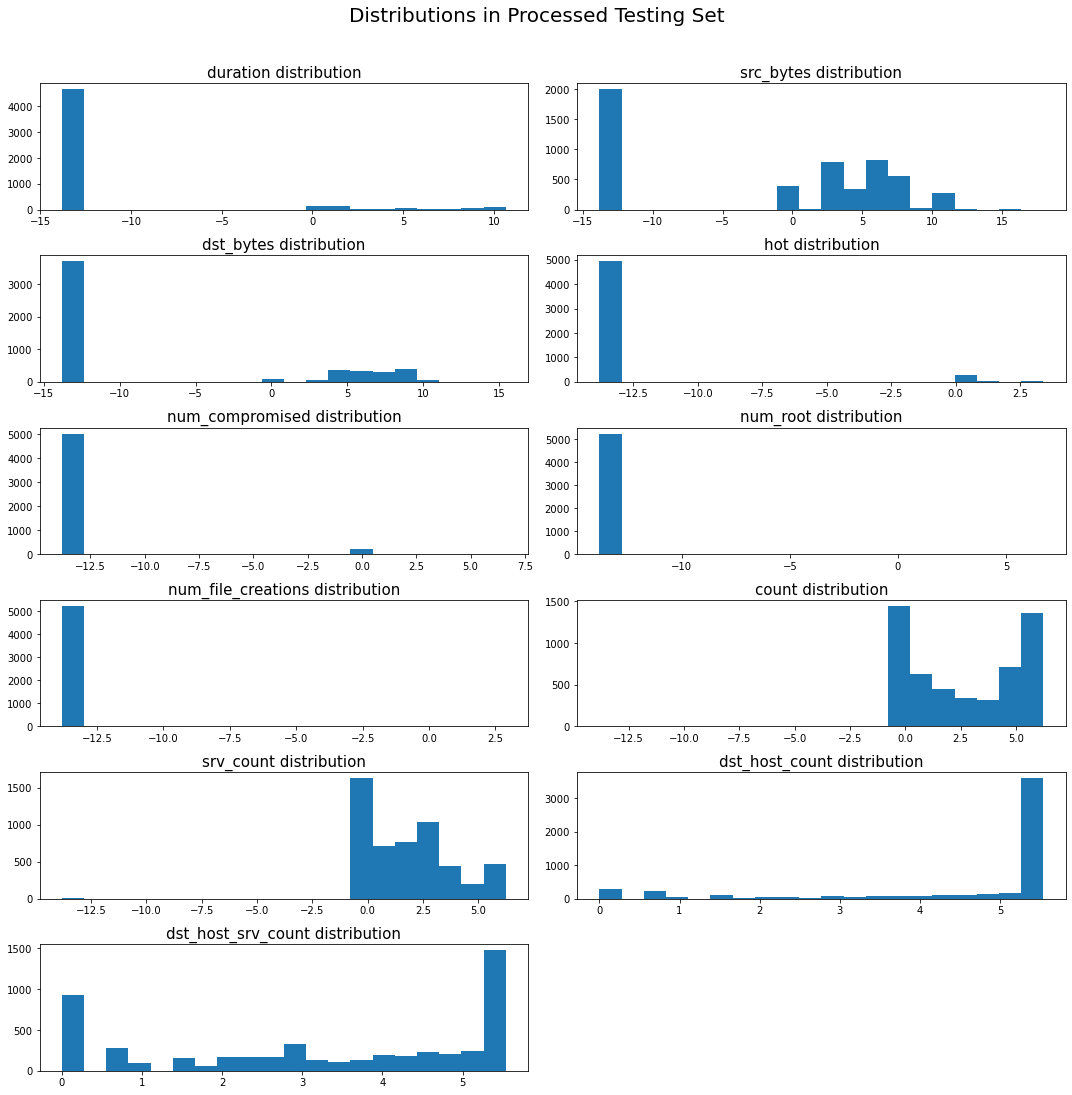

In [41]:
norm_cols = [ 'duration', 'src_bytes', 'dst_bytes', 'hot', 'num_compromised', 'num_root', 'num_file_creations', 'count', 'srv_count', 'dst_host_count', 'dst_host_srv_count']

for col in norm_cols:
    train_data[col] = np.log(train_data[col]+1e-6)
    test_data[col] = np.log(test_data[col]+1e-6)
histPlot(train_data, norm_cols, 'Distributions in Processed Training Set')
histPlot(test_data, norm_cols, 'Distributions in Processed Testing Set')

Now these features are in good ranges. Now we need to do encode categorical features. To reconcile training features mismatch we would join train and test datasets encode them and split the joined dataset back to individual training and testing set

In [43]:
train_data['train'] = 1
test_data['train'] = 0
joined_data = pd.concat([train_data, test_data])

protocol_dummies = pd.get_dummies(joined_data['protocol_type'], prefix='protocol_type')
service_dummies = pd.get_dummies(joined_data['service'], prefix='service')
flag_dummies = pd.get_dummies(joined_data['flag'], prefix='flag')
joined_data = pd.concat([joined_data, protocol_dummies, service_dummies, flag_dummies], axis=1)
train_data = joined_data[joined_data['train']==1]                                               # split train set from joined, using the train feature
test_data = joined_data[joined_data['train']==0]
remove_cols = ['train', 'protocol_type', 'service', 'flag']
train_data.drop(remove_cols, axis=1, inplace=True)
test_data.drop(remove_cols, axis=1, inplace=True)

C:\conda_tmp\ipykernel_19328\1245125610.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(remove_cols, axis=1, inplace=True)
C:\conda_tmp\ipykernel_19328\1245125610.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop(remove_cols, axis=1, inplace=True)


In [44]:
train_data.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
13,-13.815511,5.811141,-13.815511,0,0,0,-13.815511,0,1,-13.815511,...,0,0,0,0,0,0,0,0,1,0
17,-13.815511,2.890372,-13.815511,0,0,0,-13.815511,0,0,-13.815511,...,0,0,0,0,0,0,0,0,1,0
30,-13.815511,2.079442,-13.815511,0,0,0,-13.815511,0,0,-13.815511,...,0,0,0,0,0,0,0,0,1,0
33,-13.815511,-13.815511,-13.815511,0,0,0,-13.815511,0,0,-13.815511,...,1,0,0,0,0,0,0,0,0,0
46,-13.815511,3.332205,-13.815511,0,3,0,-13.815511,0,0,-13.815511,...,0,0,0,0,0,0,0,0,1,0


In [45]:
test_data.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
4,9.579280,9.999995e-07,-13.815511,0,0,0,-13.815511,0,0,-13.815511,...,0,0,0,1,0,0,0,0,0,0
8,-13.815511,6.939254e+00,-13.815511,0,0,0,-13.815511,0,0,-13.815511,...,0,0,0,0,0,0,0,0,1,0
9,-13.815511,9.999995e-07,-13.815511,0,0,0,-13.815511,0,0,-13.815511,...,0,0,0,0,0,0,0,0,1,0
11,-13.815511,-1.381551e+01,-13.815511,0,0,0,-13.815511,0,0,-13.815511,...,0,0,0,1,0,0,0,0,0,0
41,-13.815511,3.332205e+00,-13.815511,0,3,0,-13.815511,0,0,-13.815511,...,0,0,0,0,0,0,0,0,1,0


# Model Building

In [46]:
X_train = train_data.drop(['labels'], axis=1)
Y_train = train_data['labels'].copy()

X_test = test_data.drop(['labels'], axis=1)
Y_test = test_data['labels'].copy()

Splitting training set into training and validation sets

In [47]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
le = LabelEncoder()
le = le.fit(Y_train)
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

**Building a Neural Network**

In [89]:
from keras.models import Sequential
from keras.optimizers import Adam, Nadam
from keras.layers import Dense, Dropout
input_size = x_train.shape[1]

model = Sequential()
model.add(Dense(256, input_dim=input_size, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(14, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999,amsgrad=True),metrics=['accuracy'])

To perform categorical classification, we will also need to one-hot encode our target set

In [90]:
y_train_encoded = le.transform(y_train)
y_val_encoded = le.transform(y_val)
y_test_encoded = le.transform(Y_test)

y_train_dummy = np_utils.to_categorical(y_train_encoded)
y_val_dummy = np_utils.to_categorical(y_val_encoded)
y_test_dummy = np_utils.to_categorical(y_test_encoded)

In [91]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')

In [118]:
his = model.fit(x_train, y_train_dummy, epochs=100, batch_size=2500, 
          validation_data=(x_val, y_val_dummy), callbacks=[early_stopping])

Epoch 1/100
9/9 [==============================] - 0s 31ms/step - loss: 0.0743 - accuracy: 0.9796 - val_loss: 0.1034 - val_accuracy: 0.9749
Epoch 2/100
9/9 [==============================] - 0s 21ms/step - loss: 0.0712 - accuracy: 0.9811 - val_loss: 0.0970 - val_accuracy: 0.9769
Epoch 3/100
9/9 [==============================] - 0s 21ms/step - loss: 0.0664 - accuracy: 0.9840 - val_loss: 0.0880 - val_accuracy: 0.9756
Epoch 4/100
9/9 [==============================] - 0s 21ms/step - loss: 0.0621 - accuracy: 0.9852 - val_loss: 0.0912 - val_accuracy: 0.9727
Epoch 5/100
9/9 [==============================] - 0s 22ms/step - loss: 0.0639 - accuracy: 0.9845 - val_loss: 0.0888 - val_accuracy: 0.9747
Epoch 6/100
9/9 [==============================] - 0s 22ms/step - loss: 0.0659 - accuracy: 0.9845 - val_loss: 0.0945 - val_accuracy: 0.9767


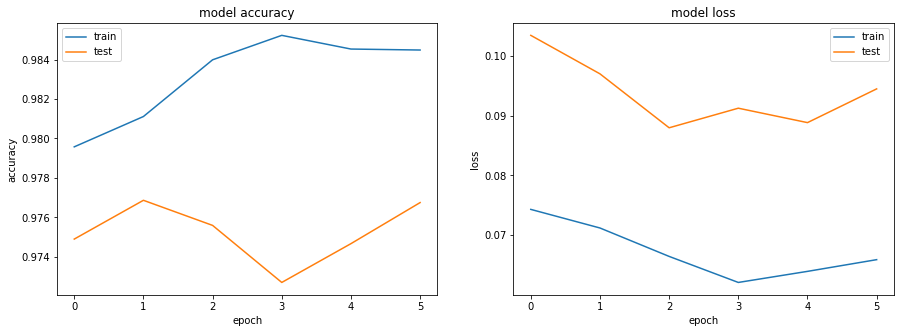

In [134]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1) 
# summarize history for accuracy
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1, 2, 2)
# summarize history for loss
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

In [121]:
pred = np.argmax(model.predict(x_val), axis=-1)
pred_decoded = le.inverse_transform(pred)

test_pred = np.argmax(model.predict(X_test), axis=-1)
test_pred_decoded = le.inverse_transform(test_pred)

# predict_x=model.predict(X_test) 
# classes_x=np.argmax(predict_x,axis=1)

164/164 [==============================] - 0s 2ms/step


In [123]:
from sklearn.metrics import f1_score, confusion_matrix
f1_score(y_val, pred_decoded, average = 'macro')

0.9753672313288231

In [124]:
f1_score(Y_test, test_pred_decoded, average = 'macro')

0.9722301812033501